In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# About the data

The column, decision, is the systematic review and the other columns are made available by the [Semantic Scholar API](https://api.semanticscholar.org/graph/v1).

In [173]:
dt = pd.read_csv( './SLRdata.csv')

dt.head()

,Unnamed: 0,index,decision,paperId,url,title,abstract,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,fieldsOfStudy,authors,externalIds.DBLP,externalIds.MAG,externalIds.DOI,externalIds.PubMed,externalIds.PubMedCentral,externalIds.ArXiv,externalIds.ACL
0,0,134,False,14a06d01a7e1d63589e70bff2b342137f922f50a,https://www.semanticscholar.org/paper/14a06d01...,Optimal control and optimization algorithm for...,"As we all know, big data and intelligent compu...",NaN,2021.0,18,0,0,False,"['Physics', 'Computer Science']","[{'authorId': '9362060', 'name': 'Xiaonan Xiao'}]",NaN,3.133735e+09,10.1088/1742-6596/1800/1/012007,NaN,NaN,NaN,NaN
1,1,133,False,c0afba52fae6d26091370eb08159d9e253b40227,https://www.semanticscholar.org/paper/c0afba52...,Reinforcement Learning for Placement Optimization,"In the past decade, computer systems and chips...",ISPD,2021.0,3,0,0,False,['Computer Science'],"[{'authorId': '46684455', 'name': 'Anna Goldie...",conf/ispd/GoldieM21,NaN,10.1145/3439706.3446883,NaN,NaN,NaN,NaN
2,2,132,True,b905a2de6da71a76f25b322a50ee711a62736e00,https://www.semanticscholar.org/paper/b905a2de...,Securities Analysis and Portfolio Management U...,Financial services institutions are adopting a...,NaN,2019.0,7,0,0,False,NaN,"[{'authorId': '123925038', 'name': 'Bhavna Gau...",NaN,NaN,10.2139/ssrn.3332162,NaN,NaN,NaN,NaN
3,3,131,False,532043b56e30d15c026a90e56ec42aecaa33a76d,https://www.semanticscholar.org/paper/532043b5...,Optimización e inteligencia artificial para la...,Decision making is a transcendental process th...,NaN,2019.0,0,0,0,True,NaN,"[{'authorId': None, 'name': 'Humberto Alejandr...",NaN,2.995318e+09,10.35707/indagare/707,NaN,NaN,NaN,NaN
4,4,129,False,251f4e32727c981ed8cf4a1f9fb2fc580f0c3cfa,https://www.semanticscholar.org/paper/251f4e32...,Hybrid chaos optimization algorithm with artif...,Much research on Artificial Intelligence (AI) ...,Appl. Math. Comput.,2012.0,28,31,0,False,['Computer Science'],"[{'authorId': '2108776795', 'name': 'Yimin Yan...",journals/amc/YangWYY12,2.034759e+09,10.1016/j.amc.2011.09.028,NaN,NaN,NaN,NaN


Total: 76



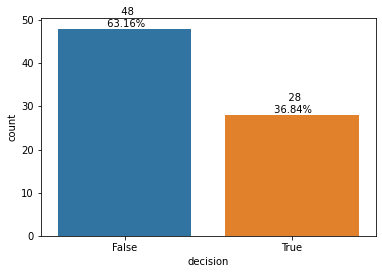

In [174]:
print(f'Total: {dt["decision"].count()}\n')
ax = sns.countplot(data=dt,x="decision")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('   {:.0f} \n {:.2f}%'.format(y,100*y/dt["decision"].count()), (x.mean(), y), 
            ha='center', va='bottom')

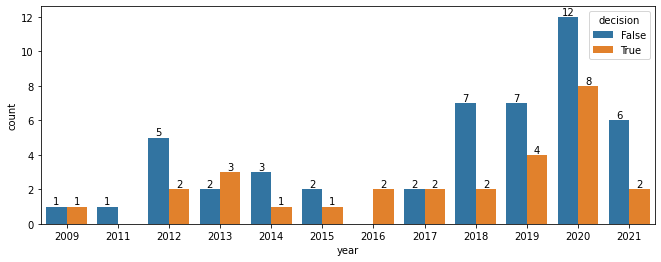

In [175]:
dt.year = dt.year.astype(int)

fig, axs = plt.subplots(ncols=1,nrows=1, figsize=(11,4))

ax = sns.countplot(data=dt,x='year',hue="decision", ax = axs)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')

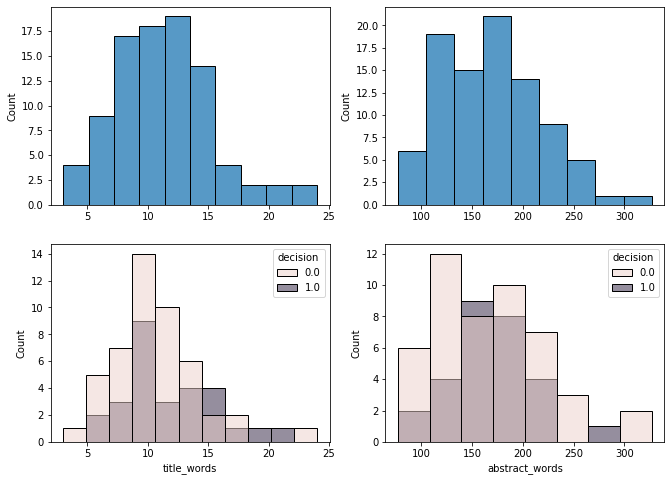

In [176]:
fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(11,8))

dt_hist = dt.loc[:, ['title', 'abstract', 'decision']].copy()

dt_hist['title'] = dt['title'].apply(lambda x : len(x.split()))
dt_hist['abstract'] = dt['abstract'].apply(lambda x : len(x.split()))



ax1 = sns.histplot(dt_hist.title, ax=axs[0,0])
ax1.set(xlabel='')

ax2 = sns.histplot(dt_hist.abstract, ax=axs[0,1])
ax2.set(xlabel='')

ax1 = sns.histplot(data= dt_hist, x= 'title', hue='decision', ax=axs[1,0])
ax1.set(xlabel='title_words')

ax2 = sns.histplot(data= dt_hist,x= 'abstract', hue='decision' , ax=axs[1,1])
ax2.set(xlabel='abstract_words')

# fig.set_size_inches()

plt.show()

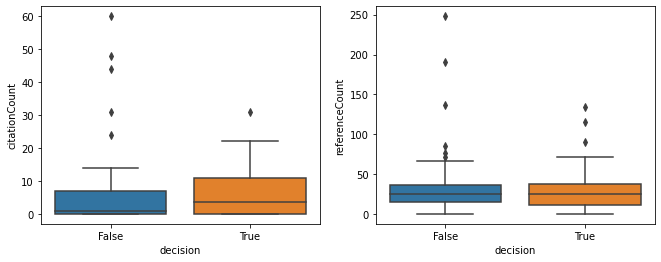

In [177]:
fig, axs = plt.subplots(ncols=2,  figsize=(11,4))

ax1 = sns.boxplot(data=dt,x="decision", y='citationCount', ax= axs[0])
ax2 = sns.boxplot(data=dt,x="decision", y='referenceCount',ax= axs[1])

plt.show()

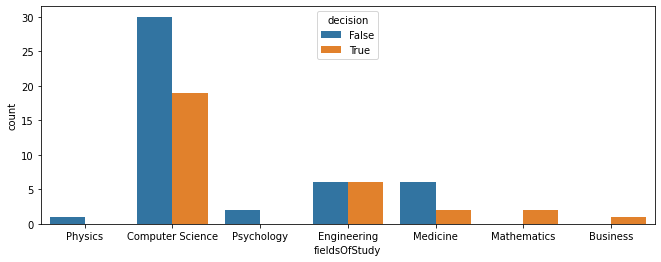

In [178]:
fig, axs = plt.subplots(ncols=1)
dt['fieldsOfStudy'] = dt['fieldsOfStudy'].dropna().apply(lambda x: eval(x))

dt_fields_decison = dt.loc[:,['fieldsOfStudy','decision']].copy()

dt_fields_decison = dt_fields_decison.explode('fieldsOfStudy')

sns.countplot(x='fieldsOfStudy', data=dt_fields_decison, hue='decision', ax = axs)
fig.set_size_inches(11,4)


plt.show()